# CLusering & PCA Assignment

In [516]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [517]:
data = pd.read_csv("Country-data.csv")

# Need to convert below columns exports,health,imports to absolute values

data['exports']=(data['exports']/100)*data['gdpp']
data['health']=(data['health']/100)*data['gdpp']
data['imports']=(data['imports']/100)*data['gdpp']
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.2000,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840


In [518]:
# Check for info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [519]:
# Check for missing values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [520]:
# data shape
data.shape

(167, 10)

In [521]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [522]:
# Removing the country column
y = data.pop("country")
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [523]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Scaling

In [524]:
# Import Standard scaling Library
from sklearn.preprocessing import StandardScaler

In [525]:
scaler = StandardScaler()

In [526]:
X = data.copy()

In [527]:
x = scaler.fit_transform(X)

C:\Users\dayan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dayan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [528]:
x[:10,:10]

array([[ 1.29153238e+00, -4.11011304e-01, -5.65039889e-01,
        -4.32275504e-01, -8.08245403e-01,  1.57336225e-01,
        -1.61909203e+00,  1.90288227e+00, -6.79179609e-01],
       [-5.38948897e-01, -3.50190960e-01, -4.39217688e-01,
        -3.13677387e-01, -3.75368896e-01, -3.12347469e-01,
         6.47866431e-01, -8.59972814e-01, -4.85623236e-01],
       [-2.72832734e-01, -3.18525766e-01, -4.84826076e-01,
        -3.53720478e-01, -2.20844469e-01,  7.89274285e-01,
         6.70423231e-01, -3.84043958e-02, -4.65375609e-01],
       [ 2.00780766e+00, -2.91374525e-01, -5.32363186e-01,
        -3.45952541e-01, -5.85043454e-01,  1.38705353e+00,
        -1.17923442e+00,  2.12815103e+00, -5.16268293e-01],
       [-6.95634115e-01, -1.04331462e-01, -1.78770538e-01,
         4.07349911e-02,  1.01731774e-01, -6.01748532e-01,
         7.04258432e-01, -5.41946330e-01, -4.18171341e-02],
       [-5.91177303e-01, -3.05464375e-01, -1.23848715e-01,
        -3.36841425e-01,  8.09204035e-02,  1.244725

# Applying PCA on Data

In [529]:
from sklearn.decomposition import PCA

In [530]:
pca = PCA(svd_solver = 'randomized', random_state = 42)

In [531]:
# pca.fit() performs PCa on data set
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [532]:
# pricipal components are the new basis vectors special basis vectors
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [533]:
# explain which PCA's are important and which or not
pca.explained_variance_ratio_.cumsum()


array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

In [534]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

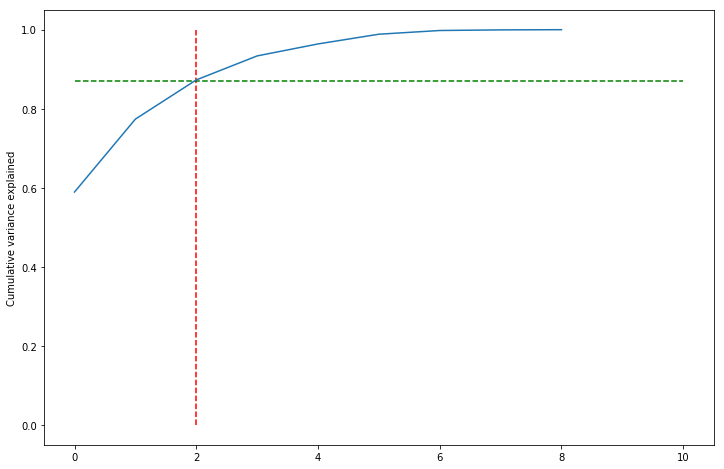

In [535]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=2, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.87, xmax=10, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

# 3 components are explaining 87% variance

# PCA with 3 components

In [536]:
from sklearn.decomposition import IncrementalPCA

In [537]:
pca_final = IncrementalPCA(n_components=3)

In [538]:
# do the fitting
#Create the two components and 
# tranform is inverting - getting the inverse of the eigen vectors (principal components/ new basis and multiplying the data)
new_data = pca_final.fit_transform(x)

In [539]:
new_data.shape

(167, 3)

In [540]:
new_data

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [541]:
corrmat = np.corrcoef(new_data.transpose())


In [542]:
corrmat.shape

(3, 3)

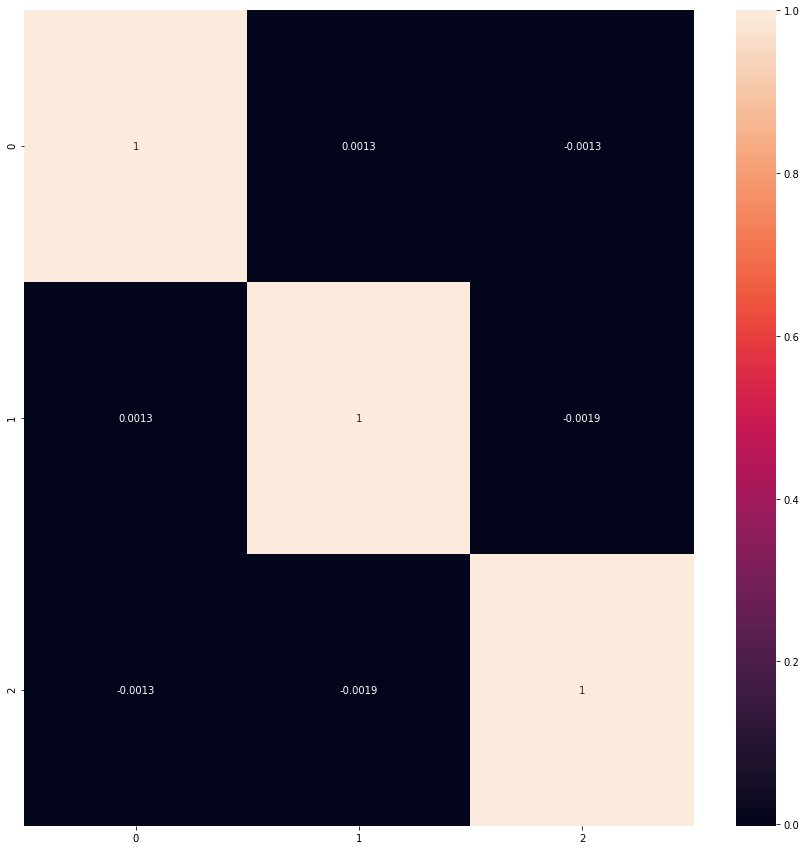

In [543]:
# Plotting heat map on PCA components
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Making data frame out of it for convenience

In [544]:
pca_df = pd.DataFrame(new_data, columns=["PC1", "PC2","PC3"])
pca_df.head()


,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


In [545]:
pca_df.shape
#pca_df.columns

(167, 3)

In [546]:
final_df = pd.concat([pca_df, y], axis=1)

In [547]:
final_df.head()

,PC1,PC2,PC3,country
0,-2.637442,1.469038,-0.541359,Afghanistan
1,-0.022277,-1.431896,-0.020701,Albania
2,-0.457626,-0.673301,0.961867,Algeria
3,-2.724520,2.174583,0.606687,Angola
4,0.649849,-1.024374,-0.250103,Antigua and Barbuda


In [548]:
final_df.shape

(167, 4)

In [549]:
final_data_pca = pd.concat([pca_df, data,y], axis=1)

In [550]:
final_data_pca.shape


(167, 13)

# Outlier Treatment


check outliers on PCA's

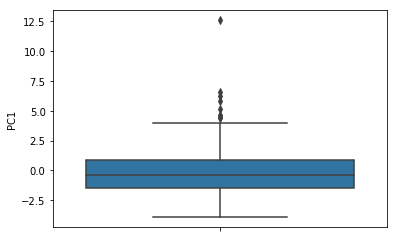

In [551]:
sns.boxplot(y=final_data_pca.PC1)

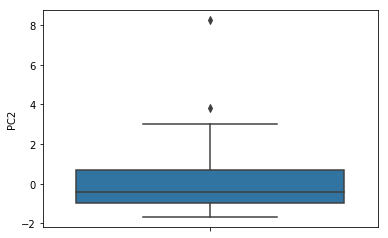

In [552]:
sns.boxplot(y=final_data_pca.PC2)

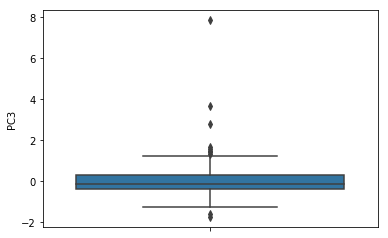

In [553]:
sns.boxplot(y=final_data_pca.PC3)

In [554]:
rm_outlr_data = final_data_pca.copy()

In [555]:
# removing (statistical) outliers for PC1,PC2,PC3
Q1 = rm_outlr_data.PC1.quantile(0.25)
Q3 = rm_outlr_data.PC1.quantile(0.75)
IQR = Q3 - Q1
rm_outlr_data = rm_outlr_data[(rm_outlr_data.PC1 >= Q1 - 1.5*IQR) & (rm_outlr_data.PC1 <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = rm_outlr_data.PC2.quantile(0.25)
Q3 = rm_outlr_data.PC2.quantile(0.75)
IQR = Q3 - Q1
rm_outlr_data = rm_outlr_data[(rm_outlr_data.PC2 >= Q1 - 1.5*IQR) & (rm_outlr_data.PC2 <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = rm_outlr_data.PC3.quantile(0.25)
Q3 = rm_outlr_data.PC3.quantile(0.75)
IQR = Q3 - Q1
rm_outlr_data = rm_outlr_data[(rm_outlr_data.PC3 >= Q1 - 1.5*IQR) & (rm_outlr_data.PC3 <= Q3 + 1.5*IQR)]

In [556]:
rm_outlr_data.shape

(149, 13)

In [557]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [558]:
kmns_rm_df = rm_outlr_data[['PC1','PC2','PC3']]
kmns_rm_df.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


In [559]:
hopkins(kmns_rm_df)

0.7440107926919637

Given data is good for clustering

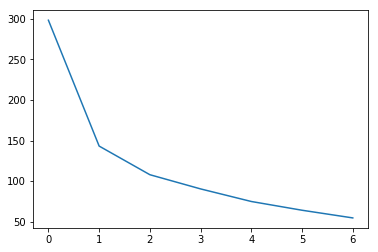

In [560]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(kmns_rm_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

elbow bend at 2 means 3 clusters

In [561]:

# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state =80)
    kmeans.fit(kmns_rm_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(kmns_rm_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.45946256207584163
For n_clusters=3, the silhouette score is 0.5171734664552139
For n_clusters=4, the silhouette score is 0.4374615104958549
For n_clusters=5, the silhouette score is 0.3863978141281593
For n_clusters=6, the silhouette score is 0.36753571913753585
For n_clusters=7, the silhouette score is 0.3641486058070635
For n_clusters=8, the silhouette score is 0.3796505481897815


In [562]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state = 42)
kmeans.fit(kmns_rm_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [563]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1,
       1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2])

In [564]:
# assign the label
kmns_rm_df['rmout_clus_id'] = kmeans.labels_
rm_outlr_data['rmout_clus_id'] = kmeans.labels_


rm_outlr_data.head()

C:\Users\dayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PC1,PC2,PC3,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,rmout_clus_id
0,-2.637442,1.469038,-0.541359,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,2
1,-0.022277,-1.431896,-0.020701,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Albania,1
2,-0.457626,-0.673301,0.961867,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,1
3,-2.724520,2.174583,0.606687,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Angola,2
4,0.649849,-1.024374,-0.250103,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,1


In [565]:
kmns_rm_df.head()

,PC1,PC2,PC3,rmout_clus_id
0,-2.637442,1.469038,-0.541359,2
1,-0.022277,-1.431896,-0.020701,1
2,-0.457626,-0.673301,0.961867,1
3,-2.724520,2.174583,0.606687,2
4,0.649849,-1.024374,-0.250103,1


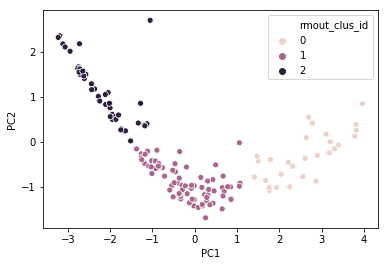

In [566]:
sns.scatterplot(x='PC1', y='PC2',hue = 'rmout_clus_id',data=kmns_rm_df)

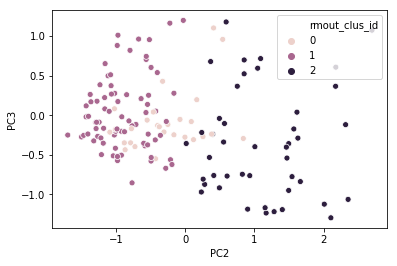

In [567]:
sns.scatterplot(x='PC2', y='PC3',hue = 'rmout_clus_id',data=kmns_rm_df)

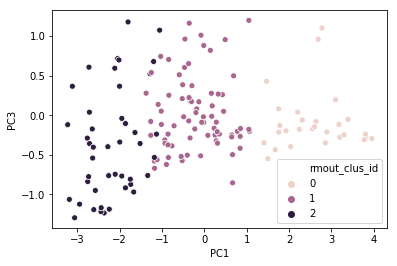

In [568]:
sns.scatterplot(x='PC1', y='PC3',hue = 'rmout_clus_id',data=kmns_rm_df)

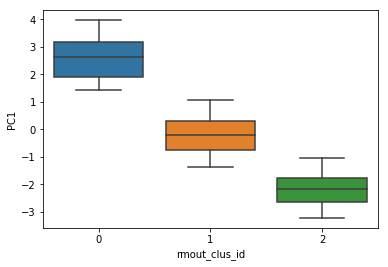

In [569]:
sns.boxplot(x='rmout_clus_id', y='PC1', data=kmns_rm_df)

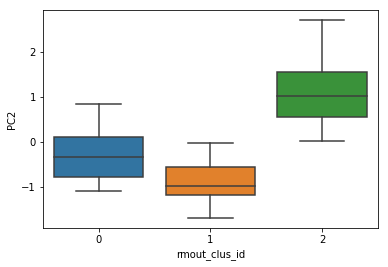

In [570]:
sns.boxplot(x='rmout_clus_id', y='PC2', data=kmns_rm_df)

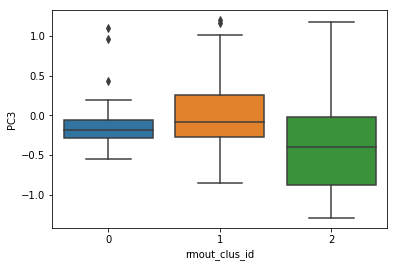

In [571]:
sns.boxplot(x='rmout_clus_id', y='PC3', data=kmns_rm_df)

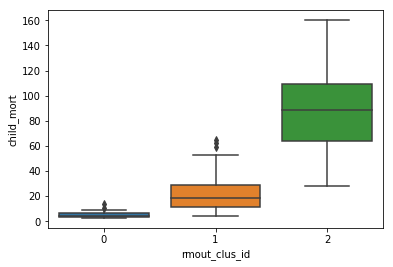

In [572]:
sns.boxplot(x='rmout_clus_id', y='child_mort', data=rm_outlr_data)

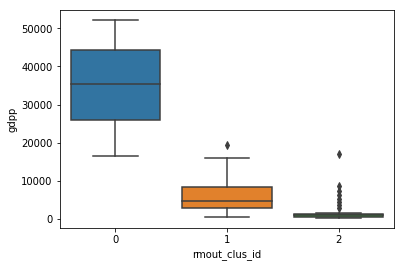

In [573]:
sns.boxplot(x='rmout_clus_id', y='gdpp', data=rm_outlr_data)

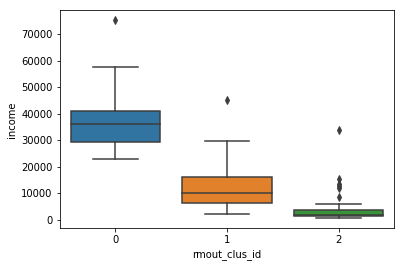

In [574]:
sns.boxplot(x='rmout_clus_id', y='income', data=rm_outlr_data)

# Analysis

In [575]:
#Analysis
gdpp_mean_km=rm_outlr_data.groupby(['rmout_clus_id']).gdpp.mean()
childmort_mean_km=rm_outlr_data.groupby(['rmout_clus_id']).child_mort.mean()
Income_mean_km=rm_outlr_data.groupby(['rmout_clus_id']).income.mean()

In [576]:
# Let's concat the resultant with the Cluster ID columns
df_clust_km=pd.concat([gdpp_mean_km,childmort_mean_km,Income_mean_km],axis=1)

In [577]:
df_clust_km

,gdpp,child_mort,income
rmout_clus_id,,,
0,35042.857143,5.292857,37310.714286
1,6065.090909,22.277922,11845.714286
2,1922.818182,87.447727,4038.295455


# The df_clust_km clearly shows that 
# CLuster 0 - Developed Countries - with High GDPP and Income and low Child_mort
# Cluster 1 - Developing Countries - with medium GDPP, income and medium Child_mort
# Cluster 2 - Under Developed COuntries with - with low GDPP, income and High Child_mort

In [578]:
#Use binning to get under Developed Countries
rm_outlr_data[rm_outlr_data['rmout_clus_id']==2]['country']

0            Afghanistan
3                 Angola
17                 Benin
21              Botswana
25          Burkina Faso
26               Burundi
28              Cameroon
32                  Chad
36               Comoros
37      Congo, Dem. Rep.
38           Congo, Rep.
40         Cote d'Ivoire
49     Equatorial Guinea
50               Eritrea
55                 Gabon
56                Gambia
59                 Ghana
63                Guinea
64         Guinea-Bissau
72                  Iraq
80                 Kenya
81              Kiribati
84                   Lao
87               Lesotho
88               Liberia
93            Madagascar
94                Malawi
97                  Mali
99            Mauritania
106           Mozambique
108              Namibia
112                Niger
116             Pakistan
126               Rwanda
129              Senegal
132         Sierra Leone
136      Solomon Islands
137         South Africa
142                Sudan
147             Tanzania


# Hierarchial CLustering(both Single and Complete Linkage)

In [579]:

hier_rm_df = rm_outlr_data[['PC1','PC2','PC3']]
hier_rm_df.shape
hier_rm_df.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


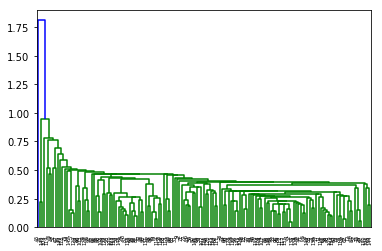

In [580]:
# single linkage
mergings = linkage(hier_rm_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

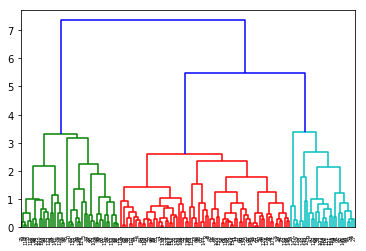

In [581]:
# complete linkage
mergings = linkage(hier_rm_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()


In [582]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels


array([0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1,
       1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1,
       1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0])

In [583]:
# assign cluster labels
hier_rm_df['Hrclstr_labels'] = cluster_labels
rm_outlr_data['Hrclstr_labels'] = cluster_labels
hier_rm_df.head()


C:\Users\dayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PC1,PC2,PC3,Hrclstr_labels
0,-2.637442,1.469038,-0.541359,0
1,-0.022277,-1.431896,-0.020701,1
2,-0.457626,-0.673301,0.961867,1
3,-2.724520,2.174583,0.606687,0
4,0.649849,-1.024374,-0.250103,1


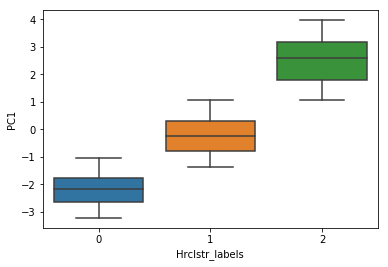

In [584]:

# plots
sns.boxplot(x='Hrclstr_labels', y='PC1', data=hier_rm_df)

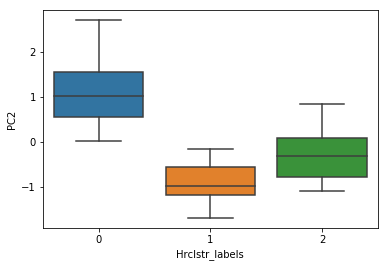

In [585]:
sns.boxplot(x='Hrclstr_labels', y='PC2', data=hier_rm_df)

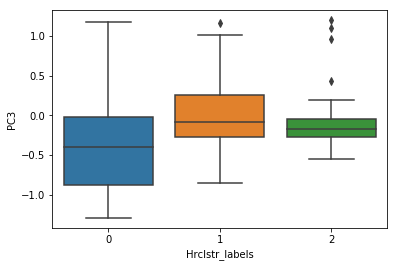

In [586]:
sns.boxplot(x='Hrclstr_labels', y='PC3', data=hier_rm_df)

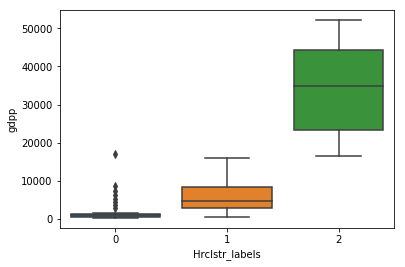

In [587]:
sns.boxplot(x='Hrclstr_labels', y='gdpp', data=rm_outlr_data)

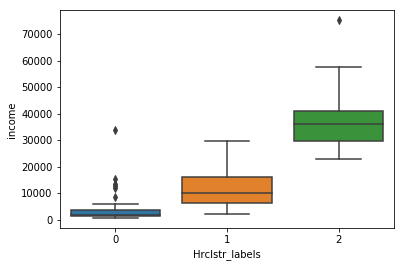

In [588]:
sns.boxplot(x='Hrclstr_labels', y='income', data=rm_outlr_data)

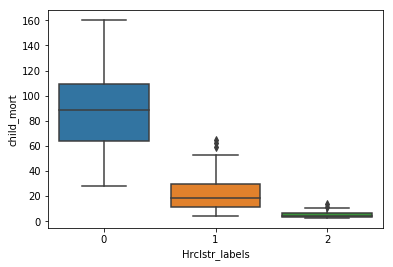

In [589]:
sns.boxplot(x='Hrclstr_labels', y='child_mort', data=rm_outlr_data)

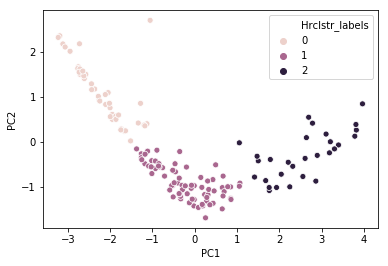

In [590]:
sns.scatterplot(x='PC1', y='PC2',hue = 'Hrclstr_labels',data=rm_outlr_data)

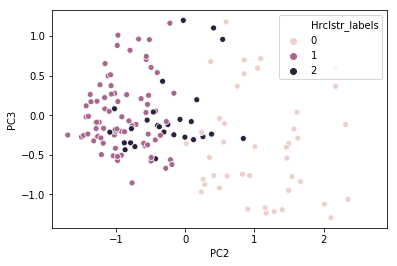

In [591]:
sns.scatterplot(x='PC2', y='PC3',hue = 'Hrclstr_labels',data=rm_outlr_data)

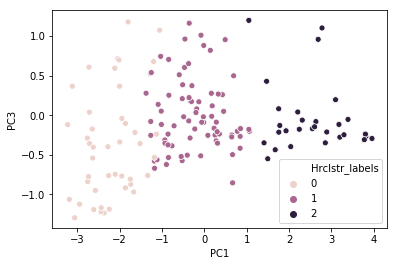

In [592]:
sns.scatterplot(x='PC1', y='PC3',hue = 'Hrclstr_labels',data=rm_outlr_data)

# Analysis

In [593]:
gdpp_mean_h=rm_outlr_data.groupby(['Hrclstr_labels']).gdpp.mean()
childmort_mean_h=rm_outlr_data.groupby(['Hrclstr_labels']).child_mort.mean()
Income_mean_h=rm_outlr_data.groupby(['Hrclstr_labels']).income.mean()

In [594]:
# Let's concat the resultant with the Cluster ID columns
df_clust_h=pd.concat([gdpp_mean_h,childmort_mean_h,Income_mean_h],axis=1)

In [595]:
# Analysed Mean data using Kmeans
df_clust_km

,gdpp,child_mort,income
rmout_clus_id,,,
0,35042.857143,5.292857,37310.714286
1,6065.090909,22.277922,11845.714286
2,1922.818182,87.447727,4038.295455


In [596]:
# The df_clust_km clearly shows that (K-MEANS) 
# CLuster 0 - Developed Countries - with High GDPP and Income and low Child_mort
# Cluster 1 - Developing Countries - with medium GDPP, income and medium Child_mort
# Cluster 2 - Under Developed COuntries with - with low GDPP, income and High Child_mort

In [597]:
# Analysed Mean data using Hierarchial clustering
df_clust_h

,gdpp,child_mort,income
Hrclstr_labels,,,
0,1922.818182,87.447727,4038.295455
1,5890.947368,22.417105,11405.526316
2,34500.000000,5.513793,37586.206897


In [598]:
# The df_clust_h clearly shows that (Hierarchial)
# CLuster 2 - Developed Countries - with High GDPP and Income and low Child_mort
# Cluster 1 - Developing Countries - with medium GDPP, income and medium Child_mort
# Cluster 0 - Under Developed COuntries with - with low GDPP, income and High Child_mort

In [599]:
# Check countries count based on Hierarchial clustering
rm_outlr_data['Hrclstr_labels'].value_counts()
#0 = Under Developed Countries
#1 = Developing Countrues
#2 = Developed Countries

1    76
0    44
2    29
Name: Hrclstr_labels, dtype: int64

In [600]:
# Check countries count based on Kmeans clustering
rm_outlr_data['rmout_clus_id'].value_counts()
#2 = Under Developed Countries
#1 = Developing Countrues
#0 = Developed Countries

1    77
2    44
0    28
Name: rmout_clus_id, dtype: int64

In [601]:
# Under Developed Countries Using K-means
rm_outlr_data[rm_outlr_data['rmout_clus_id']==2]['country']


0            Afghanistan
3                 Angola
17                 Benin
21              Botswana
25          Burkina Faso
26               Burundi
28              Cameroon
32                  Chad
36               Comoros
37      Congo, Dem. Rep.
38           Congo, Rep.
40         Cote d'Ivoire
49     Equatorial Guinea
50               Eritrea
55                 Gabon
56                Gambia
59                 Ghana
63                Guinea
64         Guinea-Bissau
72                  Iraq
80                 Kenya
81              Kiribati
84                   Lao
87               Lesotho
88               Liberia
93            Madagascar
94                Malawi
97                  Mali
99            Mauritania
106           Mozambique
108              Namibia
112                Niger
116             Pakistan
126               Rwanda
129              Senegal
132         Sierra Leone
136      Solomon Islands
137         South Africa
142                Sudan
147             Tanzania


In [602]:
# Under Developed Countries Using Hierarchal
rm_outlr_data[rm_outlr_data['Hrclstr_labels']==0]['country']

0            Afghanistan
3                 Angola
17                 Benin
21              Botswana
25          Burkina Faso
26               Burundi
28              Cameroon
32                  Chad
36               Comoros
37      Congo, Dem. Rep.
38           Congo, Rep.
40         Cote d'Ivoire
49     Equatorial Guinea
50               Eritrea
55                 Gabon
56                Gambia
59                 Ghana
63                Guinea
64         Guinea-Bissau
72                  Iraq
80                 Kenya
81              Kiribati
84                   Lao
87               Lesotho
88               Liberia
93            Madagascar
94                Malawi
97                  Mali
99            Mauritania
106           Mozambique
108              Namibia
112                Niger
116             Pakistan
126               Rwanda
129              Senegal
132         Sierra Leone
136      Solomon Islands
137         South Africa
142                Sudan
147             Tanzania


In [603]:

dfList = list(rm_outlr_data[rm_outlr_data['rmout_clus_id']==2]['country'])
dfList

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']